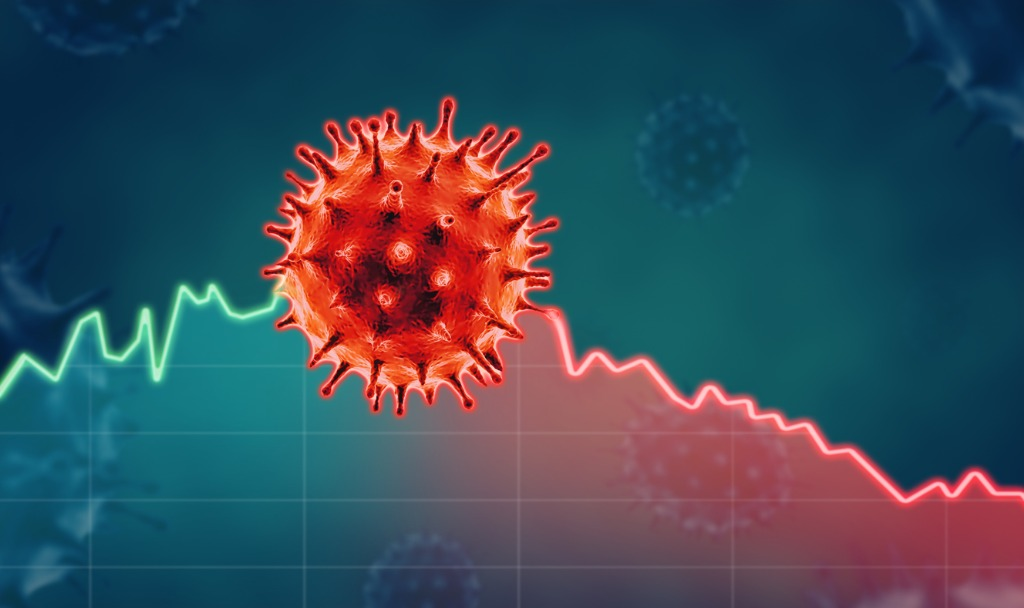

   # Le théme de la Data Analyse de porte sur la pendémie du covid-19


**Groupe 8:
   Massi Djellouli;
   Fatima Brahami;
   Mohamed Safi;
   Nouara  Ouldkaci;
   Nazim GAOUIR**

**Importation des librairies nécessaire**

In [44]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime

In [4]:
#source :https://ourworldindata.org/coronavirus-source-data

**Lecture de la Data Frame**

In [5]:
df = pd.read_csv(r"https://covid.ourworldindata.org/data/owid-covid-data.csv",index_col='date',low_memory=False)

In [6]:
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-24,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-25,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-26,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-27,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,ZWE,Africa,Zimbabwe,10718.0,101.0,128.000,291.0,0.0,2.286,721.123,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
2020-12-07,ZWE,Africa,Zimbabwe,10839.0,121.0,127.000,294.0,3.0,2.571,729.264,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
2020-12-08,ZWE,Africa,Zimbabwe,10912.0,73.0,111.857,303.0,9.0,3.714,734.176,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


**Affichage détaillé de différentes caractéristiques de la Data Frame**

In [7]:
df.shape

(61819, 49)

In [35]:
df.dtypes

iso_code                               object
continent                              object
location                               object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions                 float64
weekly_icu_admissions_per_million 

In [26]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardi

In [27]:
#le pourcentage de cellule vide dans chaque colonne 
(df.isna().sum()/61565)*100

iso_code                               0.524649
continent                              1.050922
location                               0.000000
total_cases                           14.566718
new_cases                              0.203037
new_cases_smoothed                     1.755868
total_deaths                          27.453911
new_deaths                             0.203037
new_deaths_smoothed                    1.755868
total_cases_per_million               15.067002
new_cases_per_million                  0.727686
new_cases_smoothed_per_million         2.272395
total_deaths_per_million              27.933079
new_deaths_per_million                 0.727686
new_deaths_smoothed_per_million        2.272395
reproduction_rate                     33.395598
icu_patients                          92.583448
icu_patients_per_million              92.583448
hosp_patients                         91.025745
hosp_patients_per_million             91.025745
weekly_icu_admissions                 99

In [34]:
# Remplacer les cellules qui sont des NaN par 0 
df.fillna(0, inplace=True)
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_column
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,AFG,Asia,Afghanistan,0.0,0.0,0.000,0.0,0.0,0.000,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020-01-23
2020-01-24,AFG,Asia,Afghanistan,0.0,0.0,0.000,0.0,0.0,0.000,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020-01-24
2020-01-25,AFG,Asia,Afghanistan,0.0,0.0,0.000,0.0,0.0,0.000,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020-01-25
2020-01-26,AFG,Asia,Afghanistan,0.0,0.0,0.000,0.0,0.0,0.000,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020-01-26
2020-01-27,AFG,Asia,Afghanistan,0.0,0.0,0.000,0.0,0.0,0.000,0.000,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,ZWE,Africa,Zimbabwe,10718.0,101.0,128.000,291.0,0.0,2.286,721.123,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,2020-12-06
2020-12-07,ZWE,Africa,Zimbabwe,10839.0,121.0,127.000,294.0,3.0,2.571,729.264,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,2020-12-07
2020-12-08,ZWE,Africa,Zimbabwe,10912.0,73.0,111.857,303.0,9.0,3.714,734.176,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,2020-12-08


In [28]:
#afficher les statistiques rapide ;
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.285100e+04,61694.000000,60738.000000,4.491700e+04,61694.000000,60738.000000,52543.000000,61371.000000,60420.000000,44622.000000,...,58905.000000,40099.000000,59487.000000,60197.000000,46237.000000,45591.000000,30727.000000,53989.000000,61173.000000,59227.000000
mean,2.272200e+05,2256.037832,2228.814717,8.347782e+03,51.280157,50.972719,3788.110146,41.300374,40.661125,105.672337,...,18355.764986,13.901559,262.439188,7.899254,10.398452,32.685774,50.323037,2.998905,72.859184,0.708844
std,2.195398e+06,21572.786296,21059.985080,6.539131e+04,431.640602,417.099826,7694.437288,138.214553,110.776484,202.300237,...,19388.449900,20.222857,120.484607,4.195472,10.367750,13.519275,31.732057,2.438888,7.542156,0.153612
min,1.000000e+00,-10034.000000,-525.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,3.790000e+02,0.000000,0.429000,2.200000e+01,0.000000,0.000000,78.655000,0.000000,0.081000,3.934250,...,3823.194000,0.600000,170.050000,5.290000,1.900000,21.600000,19.351000,1.300000,67.270000,0.588000
50%,3.850000e+03,14.000000,19.714000,1.240000e+02,0.000000,0.286000,604.255000,1.756000,2.886500,19.983000,...,11840.846000,2.200000,243.964000,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.736000
75%,3.793600e+04,263.000000,284.857000,1.063000e+03,4.000000,4.571000,3836.048000,24.537500,27.255750,96.468000,...,26382.287000,21.400000,331.430000,10.080000,19.100000,41.100000,82.502000,3.861000,77.970000,0.825000
max,6.959255e+07,697958.000000,624498.571000,1.581856e+06,12848.000000,10897.857000,93056.364000,8652.658000,2648.773000,1526.539000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


# 1- Analyse de la pendémie à l'echelle mondiale

In [29]:
#Duplication de la colonne date 
df['date_column']=df.index

In [30]:
#Nouvelle Data Frame a l'echelle des continents grace à un groupage
df_cont=df.groupby('continent')['new_cases'].sum()

**Graphe à bar qui shématique le nombre total  de cas en million et  par continent**

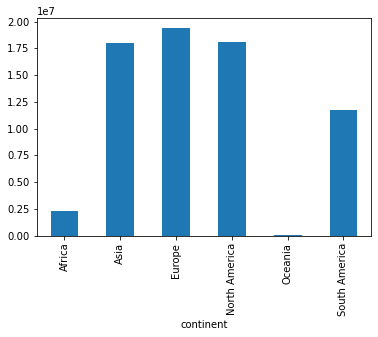

In [31]:
df_cont.plot.bar(x='continent',y='new_cases')

**Graphe à bar qui shématique le nombre d'hospitalisation par centaine depuis le debut pendémie**

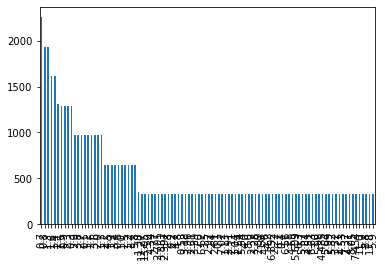

In [32]:
df['hospital_beds_per_thousand'].value_counts().plot.bar()

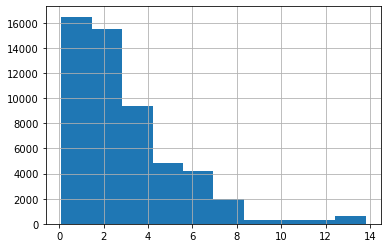

In [33]:
df['hospital_beds_per_thousand'].hist()

In [85]:
fig_1 =go.Figure(data=go.Scatter(x=df['date_column'],y=df_france['reproduction_rate'],mode='lines+markers'))
fig_1.update_layout(title ="Taux de reproduction du virus depuis le debut en %",yaxis_title="Taux de reproduction du virus",xaxis_tickangle=315)       
fig_1.show()


**Graphe qui montre le nombre total de pertes humaine et par pays**

In [23]:
df_pays =df.groupby('location')['new_deaths'].sum()

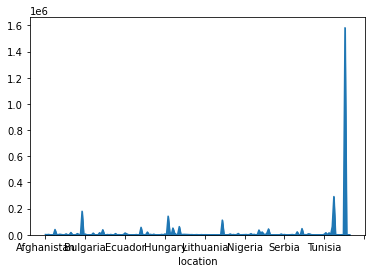

In [24]:
df_pays.plot.area(x='location',y='new_deaths')

In [87]:
df_map=df[df["date_column"]== "2020-12-07"]
df_map

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_column
date,,,,,,,,,,,,,,,,,,,,,
2020-12-07,AFG,Asia,Afghanistan,47516.0,210.0,177.429,1900.0,26.0,15.000,1220.602,...,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498,2020-12-07
2020-12-07,ALB,Europe,Albania,43683.0,695.0,785.857,922.0,17.0,16.000,15179.304,...,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785,2020-12-07
2020-12-07,DZA,Africa,Algeria,88825.0,573.0,803.714,2527.0,11.0,13.714,2025.607,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,2020-12-07
2020-12-07,AND,Europe,Andorra,7084.0,34.0,48.429,78.0,0.0,0.286,91684.463,...,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858,2020-12-07
2020-12-07,AGO,Africa,Angola,15648.0,57.0,72.714,354.0,0.0,0.857,476.111,...,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581,2020-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,VNM,Asia,Vietnam,1367.0,1.0,2.857,35.0,0.0,0.000,14.044,...,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,2020-12-07
2020-12-07,OWID_WRL,0,World,67591311.0,517609.0,616047.000,1544532.0,8477.0,10867.857,8671.335,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,2020-12-07
2020-12-07,YEM,Asia,Yemen,2383.0,46.0,27.429,649.0,10.0,4.286,79.897,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,2020-12-07


**Carte du monde avec la taille de cercle correspondant au nombre total de cas recensés**

In [93]:

fig3 = px.scatter_geo(df_map, locations=df_map.iso_code, color=df_map.continent,
                     hover_name=df_map.location, size=df_map.total_cases,
                     projection="natural earth")
fig3.show()

In [16]:
dfz = px.data.gapminder().query("year==2007")
dfz.dtypes


country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
dtype: object

**Création de nouveaux Data Frame à partir de l'original en utilisant des masques**

In [81]:
df_france = df[df["location"]== "France"]
df_esp = df[df["iso_code"]== "ESP"]
df_ita=df[df["iso_code"]== "ITA"]
df_usa=df[df["iso_code"]== "USA"]


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_column
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,USA,North America,United States,1.0,0.0,0.000,0.0,0.0,0.000,0.003,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-01-22
2020-01-23,USA,North America,United States,1.0,0.0,0.000,0.0,0.0,0.000,0.003,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-01-23
2020-01-24,USA,North America,United States,2.0,1.0,0.000,0.0,0.0,0.000,0.006,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-01-24
2020-01-25,USA,North America,United States,2.0,0.0,0.000,0.0,0.0,0.000,0.006,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-01-25
2020-01-26,USA,North America,United States,5.0,3.0,0.000,0.0,0.0,0.000,0.015,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,USA,North America,United States,14756982.0,175664.0,196235.429,282299.0,1113.0,2203.714,44582.671,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-12-06
2020-12-07,USA,North America,United States,14949417.0,192435.0,201176.000,283703.0,1404.0,2236.857,45164.041,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-12-07
2020-12-08,USA,North America,United States,15165295.0,215878.0,206210.429,286249.0,2546.0,2229.571,45816.235,...,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924,2020-12-08


In [18]:
#Conversion de type object à numeric
df_france['total_deaths']=pd.to_numeric(df_france['total_deaths'])

<ipython-input-18-bbdc2acd6e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['total_deaths']=pd.to_numeric(df_france['total_deaths'])


# 2- Analyse a l'echelle de France 

In [19]:
df_france.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardi

**courde comparatif du nombre de décés depuis le debut entre FRANCE ESPAGNE ITALIE ET USA**

In [84]:
fig_1 =go.Figure(data=go.Scatter(x=df_france['date_column'],y=df_france['total_deaths'],mode='lines+markers'))
fig_1.add_trace(go.Scatter(x=df_esp['date_column'], y=df_esp['total_deaths'],
                    mode='lines',
                    name='espagne'))
fig_1.add_trace(go.Scatter(x=df_ita['date_column'], y=df_ita['total_deaths'],
                    mode='lines',
                    name='italie'))
fig_1.add_trace(go.Scatter(x=df_usa['date_column'], y=df_usa['total_deaths'],
                    mode='lines',
                    name='USA'))

fig_1.update_layout(title ="Analyse comparatif selon le temps et du nombre déces liées au covid",yaxis_title="nombre déces",xaxis_tickangle=315)  

fig_1.show()

In [21]:
fig_1 =go.Figure(data=go.Scatter(x=df_france['date_column'],y=df_france['new_deaths'],mode='lines+markers'))
fig_1.update_layout(title ="Analyse selon le temps du nombre nouveau déces",yaxis_title="Nombre nouveau déces",xaxis_tickangle=315)       
fig_1.show()


In [53]:
fig =go.Figure(data=go.Scatter(x=df_france['date_column'],y=df_france['new_cases'],mode='lines+markers'))
fig.add_trace(go.Scatter(x=df_france['date_column'], y=df_france['total_deaths'],
                    mode='lines',
                    name='Nombre total de morts'))


fig.update_layout(title ="Analyse selon le temps du nombre nouveau déces",yaxis_title="Nombre nouveau déces",xaxis_tickangle=315)       
fig.show()

In [63]:
fig =go.Figure(go.Scatter(x=df_france['date_column'], y=df_france['new_tests'],
                    mode='lines',
                    name='Nouveau testé'))
fig.add_trace(go.Scatter(x=df_france['date_column'], y=df_france['new_cases'],
                    mode='lines',
                    name='Nombre de cas positive journalier'))

fig.update_layout(title ="Graphe sur les test anti-covid depuis le debut la pendémie",yaxis_title="tests",xaxis_tickangle=315)       
fig.show()